# Bank SQL

Columns in the DataFrame:
['Record_No', 'TransactionID', 'AccountID', 'TransactionDate', 'Amount', 'TransactionType', 'First Name', 'Last Name', 'VendorID', 'FeeID', 'FeePayable', 'FeeState', 'Card', 'MCC GroupName', 'Channel', 'CardState', 'CardToken', 'Server_Location', 'User_Location', 'StateID', 'Currency']
Query 1 result:
   Record_No  TransactionID       AccountID TransactionDate   Amount  \
0          1  TR00000000001  760-1866-G2401      2024-02-07  1872.53   
1          2  TR00000000002  782-7116-Q1889      2024-04-28  6108.37   
2          3  TR00000000003  558-2810-K1030      2024-04-04  5932.84   
3          4  TR00000000004  900-6704-K6834      2024-03-09  2294.56   
4          5  TR00000000005  556-5707-E8451      2024-02-09   911.11   
5          6  TR00000000006  326-5544-O9412      2024-04-13   205.86   
6          7  TR00000000007  903-2660-R2347      2024-01-08  2960.16   
7          8  TR00000000008  598-1671-M9615      2024-03-10  1125.56   
8          9  TR0000000

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


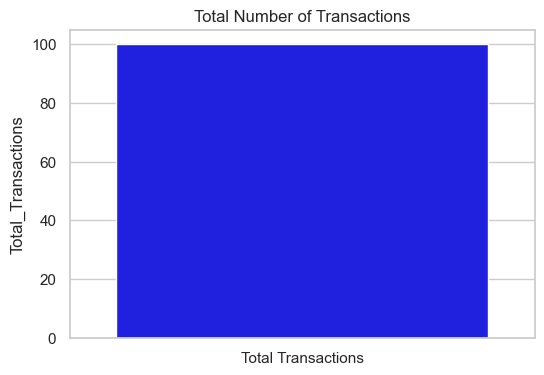

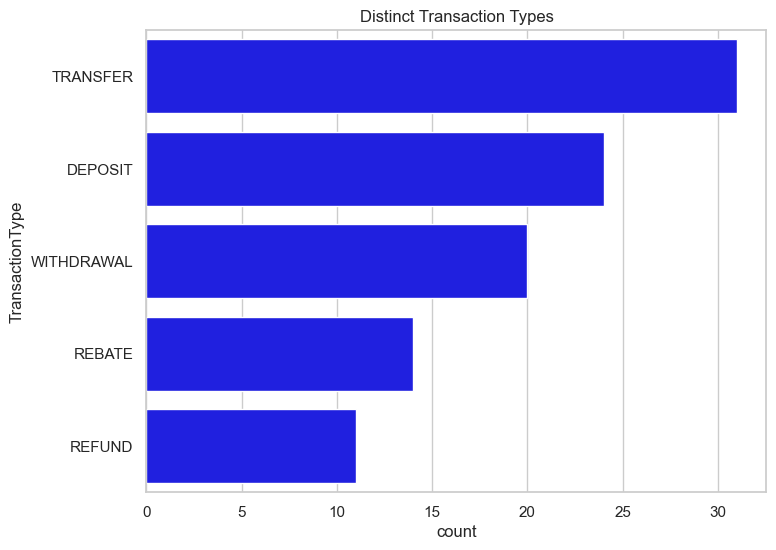

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


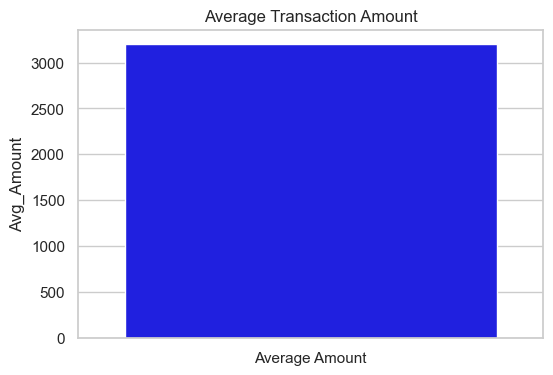

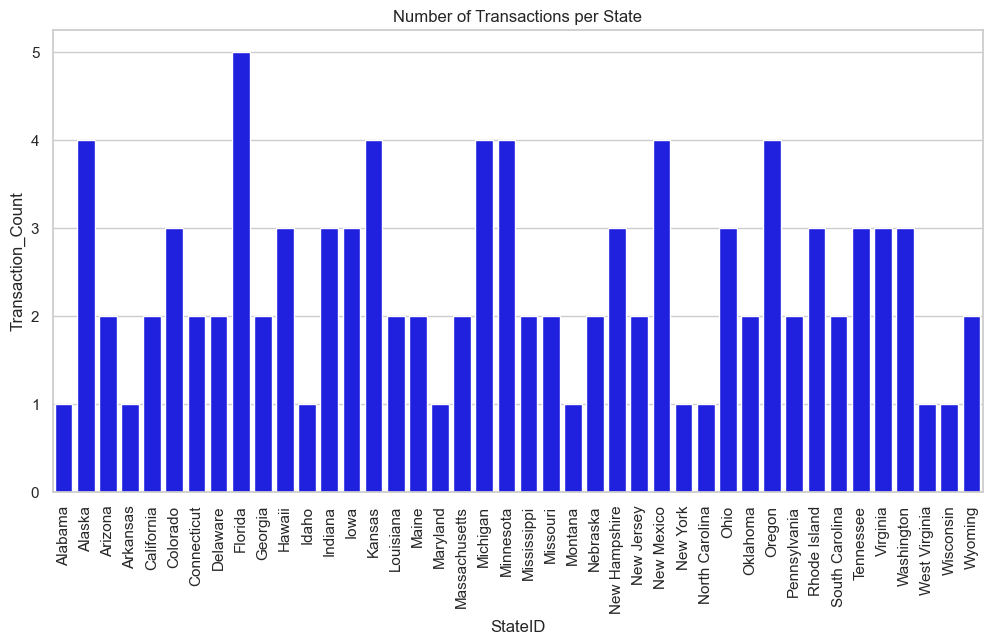

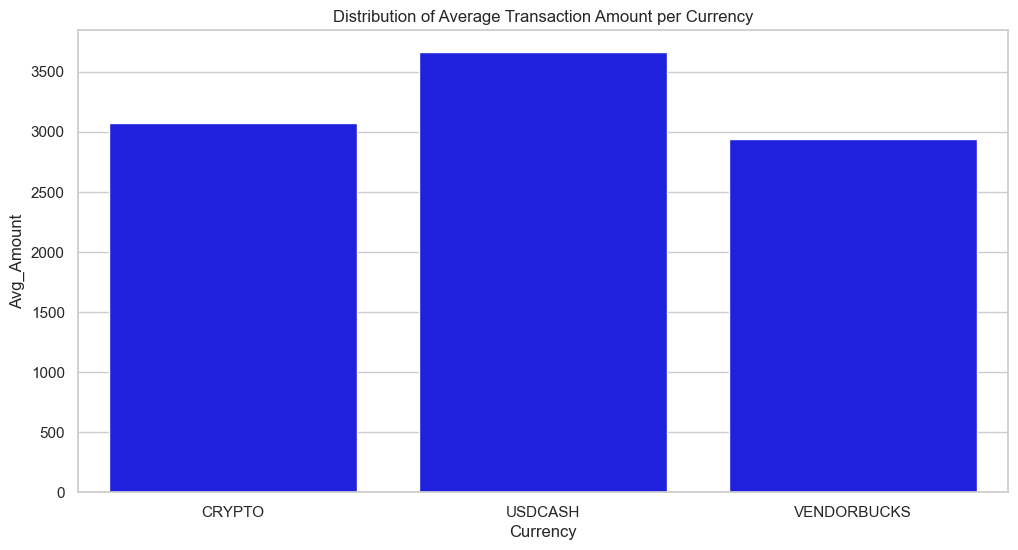

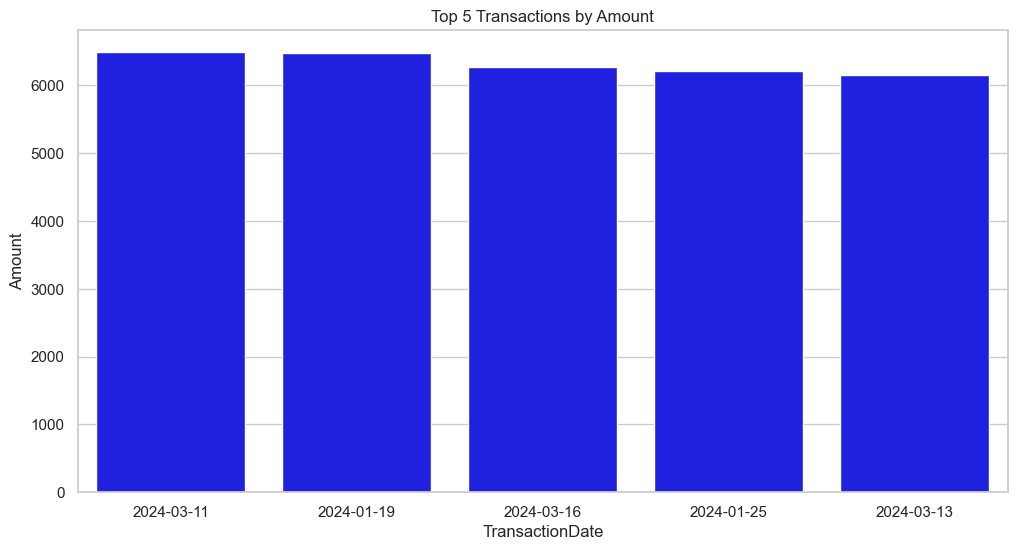

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


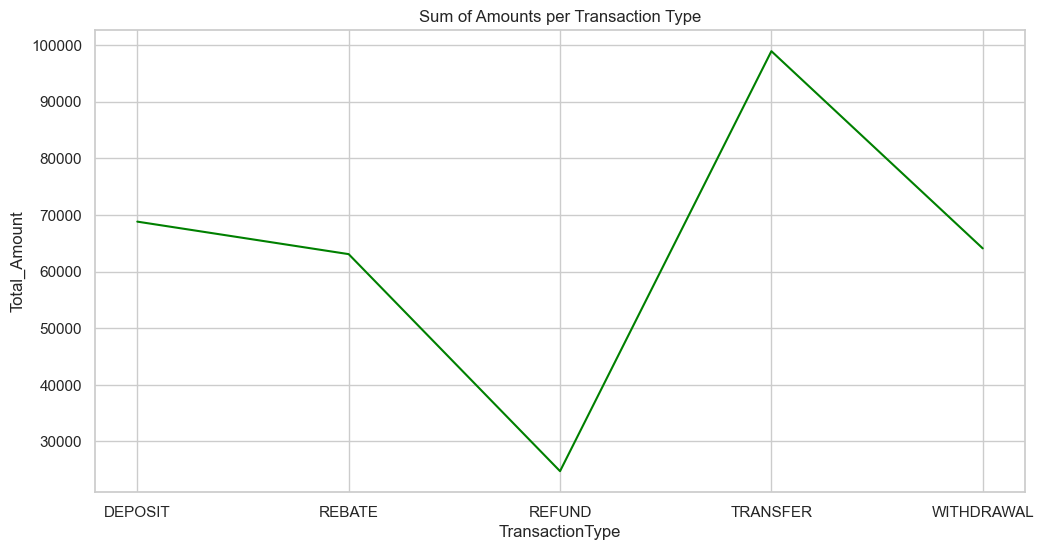

In [33]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the CSV file
file_path = 'https://raw.githubusercontent.com/guzmanwolfrank/Data-SQL/BankSQL/BankSQL/data/banking_data.csv'

# Read CSV file into pandas DataFrame
df = pd.read_csv(file_path)

# Display the columns to verify column names
print("Columns in the DataFrame:")
print(df.columns.tolist())

# Connect to SQLite database (or create it)
conn = sqlite3.connect('banking_data.db')

# Convert DataFrame to SQL
df.to_sql('banking_data', conn, if_exists='replace', index=False)

# Function to run SQL query and return the result as a DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

# Define 10 SQL queries
queries = [
    "SELECT * FROM banking_data LIMIT 10;",  # 1. Select first 10 rows
    "SELECT COUNT(*) AS Total_Transactions FROM banking_data;",  # 2. Count the number of rows
    "SELECT DISTINCT TransactionType FROM banking_data;",  # 3. Select distinct transaction types
    "SELECT AVG(Amount) AS Avg_Amount FROM banking_data;",  # 4. Calculate the average transaction amount
    "SELECT StateID, COUNT(*) AS Transaction_Count FROM banking_data GROUP BY StateID;",  # 5. Count number of transactions per state
    "SELECT Currency, AVG(Amount) AS Avg_Amount FROM banking_data GROUP BY Currency;",  # 6. Average transaction amount per currency
    "SELECT TransactionDate, Amount FROM banking_data ORDER BY Amount DESC LIMIT 5;",  # 7. Top 5 transactions by amount
    "SELECT * FROM banking_data WHERE Amount > 10000;",  # 8. Select all transactions with amount > 10000
    "SELECT TransactionType, SUM(Amount) AS Total_Amount FROM banking_data GROUP BY TransactionType;",  # 9. Sum of amounts per transaction type
    "SELECT TransactionDate, COUNT(*) AS Transaction_Count FROM banking_data GROUP BY TransactionDate HAVING COUNT(*) > 10;"  # 10. Transactions per day with more than 10 transactions
]

# Execute each query and store the results
results = [run_query(query) for query in queries]

# Close the connection
conn.close()

# Create visualizations using seaborn
sns.set(style="whitegrid")

# 1. Visualization for first 10 rows (Display as a table)
print("Query 1 result:")
print(results[0])

# 2. Total number of transactions (Bar plot)
plt.figure(figsize=(6, 4))
sns.barplot(x=["Total Transactions"], y=results[1]["Total_Transactions"], color='blue')
plt.title("Total Number of Transactions")
plt.show()

# 3. Distinct transaction types (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='TransactionType', order=df['TransactionType'].value_counts().index, color='blue')
plt.title("Distinct Transaction Types")
plt.show()

# 4. Average transaction amount (Bar plot)
plt.figure(figsize=(6, 4))
sns.barplot(x=["Average Amount"], y=results[3]["Avg_Amount"], color='blue')
plt.title("Average Transaction Amount")
plt.show()

# 5. Number of transactions per state (Bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=results[4], x='StateID', y='Transaction_Count', color='blue')
plt.xticks(rotation=90)
plt.title("Number of Transactions per State")
plt.show()

# 6. Average transaction amount per currency (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=results[5], x='Currency', y='Avg_Amount', color='blue')
plt.title("Distribution of Average Transaction Amount per Currency")
plt.show()


# 7. Top 5 transactions by amount (Bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=results[6], x='TransactionDate', y='Amount', color='blue')
plt.title("Top 5 Transactions by Amount")
plt.show()


# 8. Sum of amounts per transaction type (Line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=results[8], x='TransactionType', y='Total_Amount', color='green')
plt.title("Sum of Amounts per Transaction Type")
plt.show()



In [ ]:
# Send to a S3 Bucket 


# Import AWS and PIL 
import boto3
import io
from PIL import Image

# Initialize Boto3 S3 client
s3 = boto3.client('s3',
                  aws_access_key_id='YOUR_ACCESS_KEY_ID',
                  aws_secret_access_key='YOUR_SECRET_ACCESS_KEY',
                  region_name='YOUR_REGION')

# Function to save plot as .jpeg in memory
def save_plot_to_memory(plt):
    buffer = io.BytesIO()
    plt.savefig(buffer, format='jpeg')
    buffer.seek(0)
    return buffer

# Save each plot as .jpeg and upload to S3 bucket
for i, result in enumerate(results):
    plt.figure(figsize=(12, 6))
    if i == 5:  # For the 6th plot (Average transaction amount per currency)
        sns.violinplot(data=result, x='Currency', y='Avg_Amount', color='blue')
        plt.title("Distribution of Average Transaction Amount per Currency")
    elif i == 8:  # For the 9th plot (Sum of amounts per transaction type)
        sns.lineplot(data=result, x='TransactionType', y='Total_Amount', color='green')
        plt.title("Sum of Amounts per Transaction Type")
    else:
        continue

    # Save plot as .jpeg in memory
    buffer = save_plot_to_memory(plt)

    # Upload to S3 bucket
    s3.upload_fileobj(buffer, 'YOUR_BUCKET_NAME', f'plot_{i+1}.jpeg')

    # Close plot to release memory
    plt.close()
